In [1]:
import pandas as pd
import numpy as np
mydata = pd.read_csv('50_Startups.csv')

In [2]:
mydata.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [3]:
X = mydata.drop(['Profit'], axis= 1).values
y = mydata['Profit'].values
print(X)
print(y)


[[165349.2  136897.8  471784.1 ]
 [162597.7  151377.59 443898.53]
 [153441.51 101145.55 407934.54]
 [144372.41 118671.85 383199.62]
 [142107.34  91391.77 366168.42]
 [131876.9   99814.71 362861.36]
 [134615.46 147198.87 127716.82]
 [130298.13 145530.06 323876.68]
 [120542.52 148718.95 311613.29]
 [123334.88 108679.17 304981.62]
 [101913.08 110594.11 229160.95]
 [100671.96  91790.61 249744.55]
 [ 93863.75 127320.38 249839.44]
 [ 91992.39 135495.07 252664.93]
 [119943.24 156547.42 256512.92]
 [114523.61 122616.84 261776.23]
 [ 78013.11 121597.55 264346.06]
 [ 94657.16 145077.58 282574.31]
 [ 91749.16 114175.79 294919.57]
 [ 86419.7  153514.11      0.  ]
 [ 76253.86 113867.3  298664.47]
 [ 78389.47 153773.43 299737.29]
 [ 73994.56 122782.75 303319.26]
 [ 67532.53 105751.03 304768.73]
 [ 77044.01  99281.34 140574.81]
 [ 64664.71 139553.16 137962.62]
 [ 75328.87 144135.98 134050.07]
 [ 72107.6  127864.55 353183.81]
 [ 66051.52 182645.56 118148.2 ]
 [ 65605.48 153032.06 107138.38]
 [ 61994.4

In [4]:
X.shape

(50, 3)

In [5]:
print(X[:10])

[[165349.2  136897.8  471784.1 ]
 [162597.7  151377.59 443898.53]
 [153441.51 101145.55 407934.54]
 [144372.41 118671.85 383199.62]
 [142107.34  91391.77 366168.42]
 [131876.9   99814.71 362861.36]
 [134615.46 147198.87 127716.82]
 [130298.13 145530.06 323876.68]
 [120542.52 148718.95 311613.29]
 [123334.88 108679.17 304981.62]]


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20)


In [7]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(40, 3) (10, 3) (40,) (10,)


In [8]:
from sklearn.tree import DecisionTreeRegressor

In [9]:
LL_dt = DecisionTreeRegressor().fit(X_train, y_train)

In [10]:
print('The training r_sq is: %.2f'% LL_dt.score(X_train, y_train))

The training r_sq is: 1.00


In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

In [12]:
ytrain_pred = LL_dt.predict(X_train)

In [13]:
print("The r_sq is:", r2_score(y_train, ytrain_pred))

The r_sq is: 1.0


In [14]:
print("The MAE is: ",mean_absolute_error(y_train, ytrain_pred))

The MAE is:  0.0


In [15]:
print("The MSE is: ", mean_squared_error(y_train, ytrain_pred))

The MSE is:  0.0


In [16]:
print("The RMSE is: ", np.sqrt(mean_absolute_error(y_train,ytrain_pred)))

The RMSE is:  0.0


In [17]:
print("The EVS is : ", explained_variance_score(y_train, ytrain_pred))

The EVS is :  1.0


In [18]:
ytest_pred = LL_dt.predict(X_test)

In [19]:
print('The testing r_sq is: %.2f'% r2_score(y_test,ytest_pred))

The testing r_sq is: 0.89


In [20]:
print("The testing r_sq is : %.2f"% LL_dt.score(X_test,y_test))

The testing r_sq is : 0.89


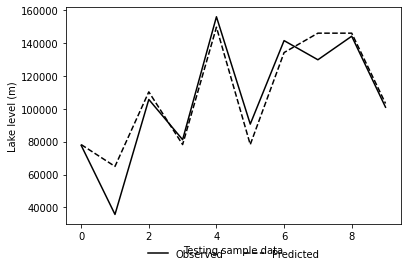

In [21]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10,6)
x_ax = range(len(X_test))
plt.plot(x_ax,y_test, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, ytest_pred, label = 'Predicted', color = 'k', linestyle = '--')
plt.ylabel('Lake level (m)')
plt.xlabel('Testing sample data')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2,frameon = False)
plt.show()

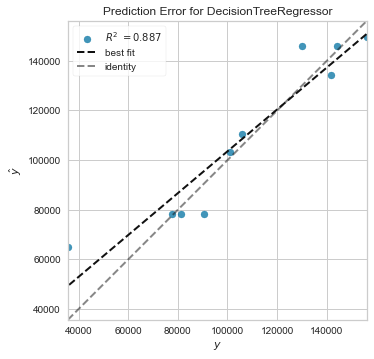

<AxesSubplot:title={'center':'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [22]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(LL_dt)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

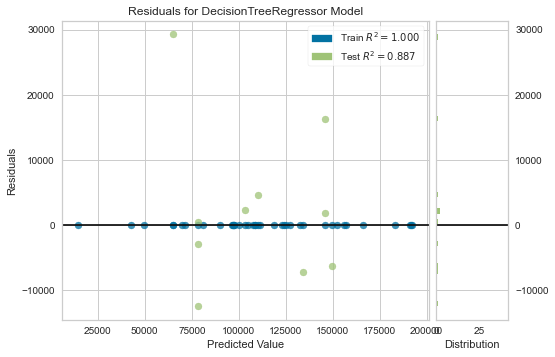

<AxesSubplot:title={'center':'Residuals for DecisionTreeRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [23]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(LL_dt)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()


In [24]:
print("The MAE is: %.2f"% mean_absolute_error(y_test, ytest_pred))

The MAE is: 8375.58


In [25]:
print('The MSE is: %.2f'% mean_squared_error(y_test, ytest_pred))

The MSE is: 140634886.08


In [26]:
print("The RMSE is: %.2f"% np.sqrt(mean_squared_error(y_test, ytest_pred)))

The RMSE is: 11858.96


In [27]:
print("The EVS is: %.2f"% explained_variance_score(y_test, ytest_pred))

The EVS is: 0.89


In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
score_train = cross_val_score(LL_dt, X_train, y_train, scoring='neg_mean_squared_error', cv=10)

In [30]:
score_train

array([-4.56209664e+08, -1.12414140e+09, -1.15663626e+07, -6.73285143e+07,
       -2.55098434e+08, -2.39843420e+08, -1.20382743e+08, -3.87368796e+08,
       -1.44901241e+08, -1.19064032e+08])

In [31]:
score_train = np.mean(score_train)

In [32]:
score_train

-292590460.33727247

In [33]:
from numpy import absolute

In [34]:
score_train = absolute(score_train)
score_train

292590460.33727247

In [35]:
score_test = cross_val_score(LL_dt, X_test, y_test, scoring= 'neg_mean_squared_error', cv = 10)

In [36]:
score_test

array([-1.66651576e+08, -2.07531725e+09, -2.23624952e+07, -1.17664779e+07,
       -2.53904830e+09, -2.25761143e+08, -7.14963425e+06, -1.36153426e+08,
       -2.05703290e+08, -2.23624952e+07])

In [37]:
score_test = absolute(np.mean(score_test))
score_test

541227608.1222801